## Data Exploration

#### 1. **Importing libraries**

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Comment:** Importing essential libraries for data loading, visualization, and analysis:

- `pandas`: data manipulation
- `seaborn` and `matplotlib.pyplot`: for plotting and correlation heatmaps


#### 2. **Loading the dataset**

In [37]:
DATAPATH = "/Users/erik/Documents/GitHub/customer-churn-prediction/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"

**Comment:** Loading the raw Telco Customer Churn dataset into a DataFrame. First few rows are displayed to inspect structure.


#### 3. **Basic info and missing values**

In [38]:
df = pd.read_csv(DATAPATH)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [40]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [41]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


**Comment:** 

- `.info()`:  shows data types and non-null values for each column.
- `.isnull().sum()` identifies missing values per column.
- `.describe()` provides summary statistics (mean, std, min, max, quartiles) for all numerical columns.


In [42]:
df.drop('customerID', axis=1, inplace=True)


#### 4. **Dataset balance**

**Comment:** Visualize class imbalance between churned and non-churned customers. This helps assess if oversampling might be needed later.

In [43]:
churn_counts = df['Churn'].value_counts().sort_index()
print(churn_counts)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


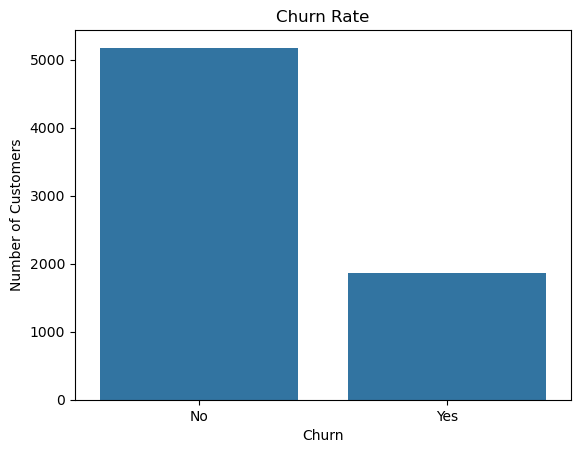

In [44]:
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title("Churn Rate")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()


#### 5. **Fixing data types and imputing missing values**

In [45]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

**Comment:**

- Converts `TotalCharges` from object to float.
- Replaces missing values (created by coercion) with the median.

#### 6. **Correlation heatmap**

In [46]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

**Comment:** Converts the `Churn` column from categorical ('Yes'/'No') to binary (1/0), which is necessary for numerical analysis and machine learning models.

Text(0.5, 1.0, 'Correlation Heatmap')

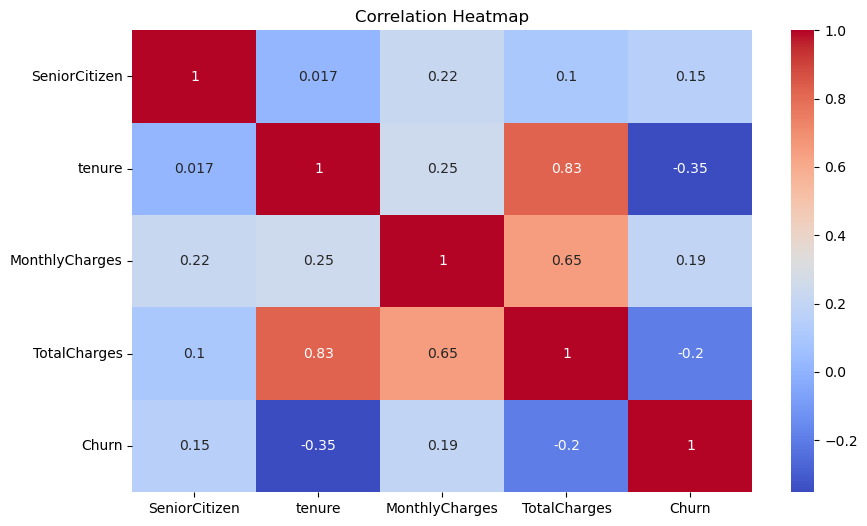

In [47]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

**Comment:** Computes the correlation matrix for all numeric features and visualizes it using a heatmap. This helps identify multicollinearity and relationships between variables, which can inform feature selection.

Text(0.5, 1.0, 'Correlation with Churn')

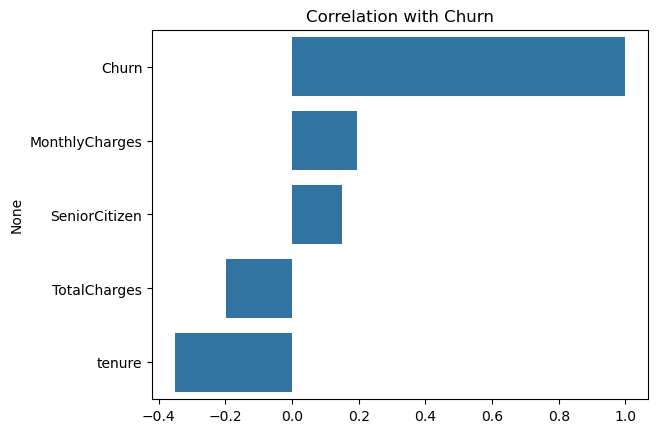

In [48]:
churn_corr = df.corr(numeric_only=True)['Churn'].sort_values(ascending=False)
sns.barplot(x=churn_corr.values, y=churn_corr.index)
plt.title("Correlation with Churn")

**Comment:** Calculates and sorts the correlation of each numeric feature with the `Churn` variable. The bar plot highlights which features are most positively or negatively associated with customer churn.

#### 6. **Churn rate by contract type and payment method**

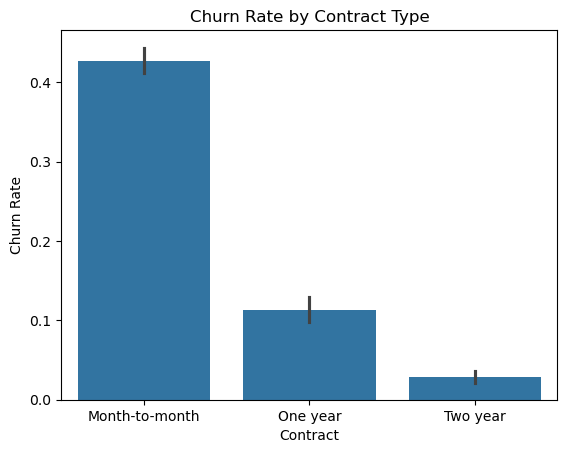

In [49]:
sns.barplot(x="Contract", y="Churn", data=df)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")

plt.show()

**Comment:** Displays the average churn rate for each payment method using a bar plot. The mean per group represents the proportion of customers who churned.

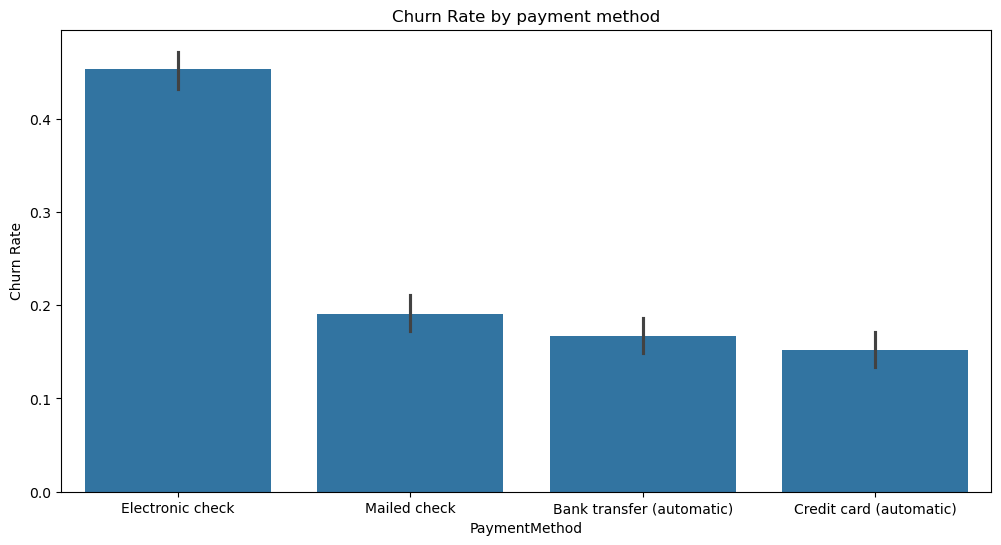

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x="PaymentMethod", y="Churn", data=df)
plt.title("Churn Rate by payment method")
plt.ylabel("Churn Rate")
plt.show()

**Comment:** Displays the average churn rate for each payment method. Useful for identifying whether certain billing methods are linked to higher churn.

#### 8. **Tenure VS churn**

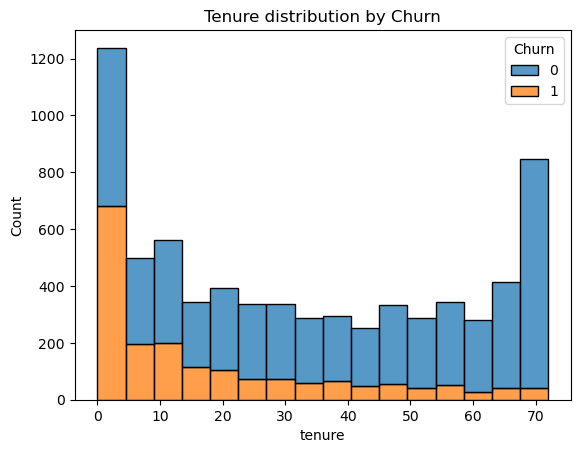

In [52]:
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack")
plt.title("Tenure distribution by Churn")
plt.show()

**Comment:** Plots the distribution of customer tenure, stacked by churn status. This helps reveal how churn likelihood varies across different customer lifespans.

In [59]:
#### 8. **Monthly Charges VS churn**

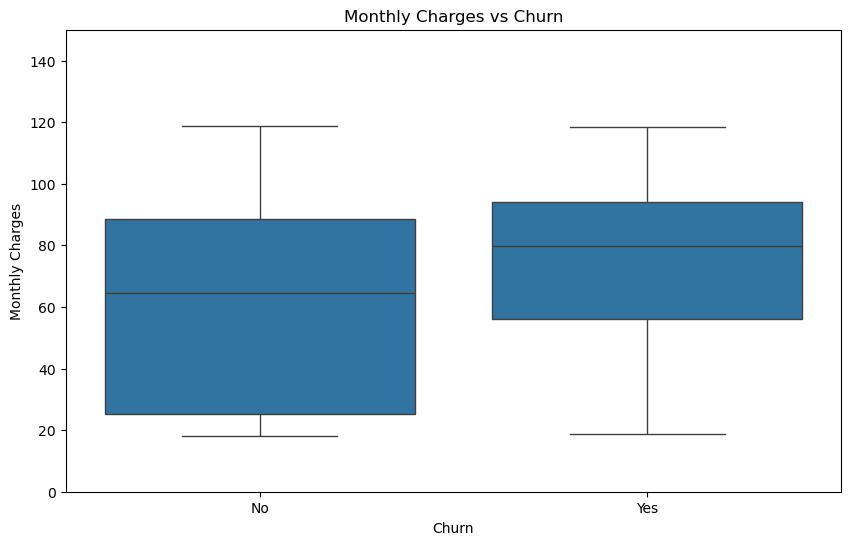

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges vs Churn")
plt.ylabel("Monthly Charges")
plt.ylim(0, 150)
plt.show()

**Comment:** Compares the distribution of monthly charges between churned and non-churned customers. Boxplots reveal differences in medians and variability, helping identify if higher charges are linked to churn.

#### 8. **All categorical features VS churn**

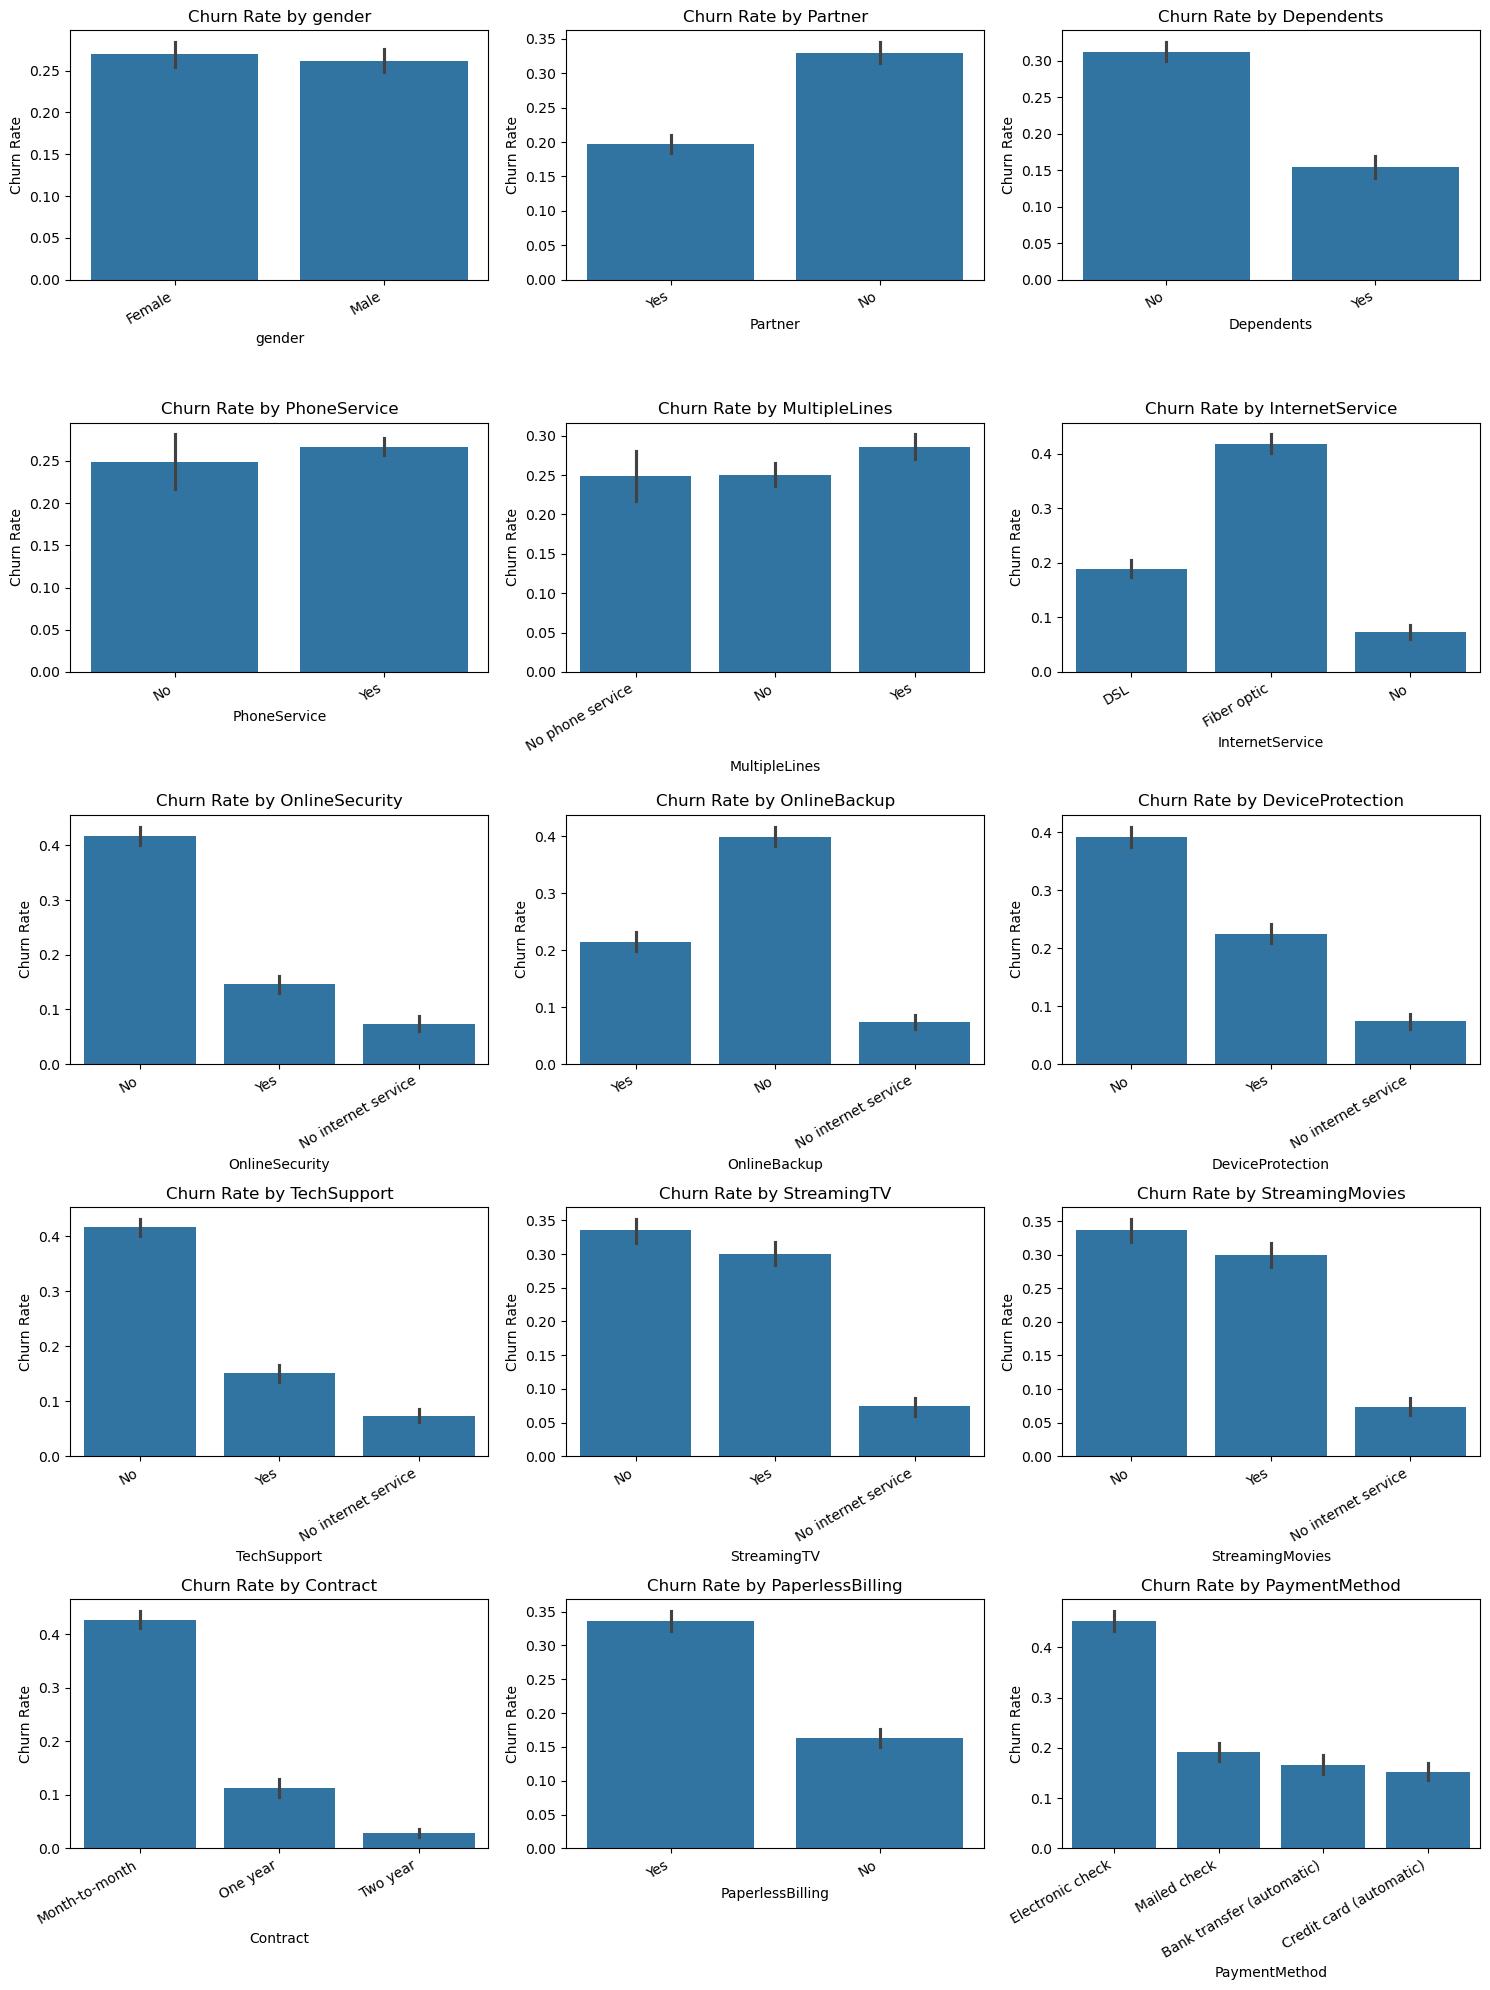

In [58]:
categorical_cols = df.select_dtypes(include='object').columns

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.barplot(x=col, y="Churn", data=df)
    plt.xticks(rotation=30, ha='right')
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")

plt.tight_layout()
plt.show()

**Comment:** Automatically generates bar plots showing churn rates across all categorical features. This helps identify which customer groups have higher churn tendencies.